# SMA Cross-Over Trading Strategy

## 1- Import the necessary libraries 

I imported all the python libraries I'll need for this implementation

In [74]:
import yfinance as yf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## 2- Download some stock data 

Here, I chose to use **AAPL (Apple)** stock, but you’re free to choose any other ticker.  
The dataset covers the last **5 years** with a **daily interval**.  
The data has been downloaded from **Yahoo Finance**.


In [75]:
ticker = "AAPL"
period = "5y"
interval = "1d"
raw = yf.download(ticker, period=period, interval=interval, auto_adjust = False)

[*********************100%***********************]  1 of 1 completed


## 3- Data Exploration 

Let's take a quick look at our raw dataset.

The table below will show you the first few rows of Apple's daily stock data, including both adjusted and unadjusted prices along with trading volume.

I’ll focus on the **Adjusted Close** column, which accounts for corporate actions such as stock splits and dividends.  
This value gives a more accurate picture of the stock’s true historical performance.

Next, I’ll:
- Keep only the adjusted closing price and rename it to **price**.
- Sort the dataset by date and remove any missing values.
- Display the first few rows to confirm the transformation.
- Check the dataset’s structure, missing values, and overall shape.

In [76]:
raw.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-10-12,121.006104,124.400002,125.180000,119.279999,120.059998,240226800
2020-10-13,117.796127,121.099998,125.389999,119.650002,125.269997,262330500
2020-10-14,117.883667,121.190002,123.029999,119.620003,121.000000,150712000
2020-10-15,117.416756,120.709999,121.199997,118.150002,118.720001,112559200
2020-10-16,115.772881,119.019997,121.550003,118.809998,121.279999,115393800


In [77]:
df = raw[['Adj Close']].rename(columns={'Adj Close': 'price'})
df = df.sort_index().dropna()
print(df.head())
df.info()
df.isna().sum()
df.shape


Price            price
Ticker            AAPL
Date                  
2020-10-12  121.006104
2020-10-13  117.796127
2020-10-14  117.883667
2020-10-15  117.416756
2020-10-16  115.772881
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2020-10-12 to 2025-10-10
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (price, AAPL)  1256 non-null   float64
dtypes: float64(1)
memory usage: 19.6 KB


(1256, 1)

## 4- Compute the Moving Averages 

The heart of this strategy lies here.  
The goal is to identify **trends** in the data, which will later serve as **signals for trades**.

To detect the underlying trend in Apple’s stock price, we’ll calculate two **Simple Moving Averages (SMAs):**

- **Fast SMA (20-day):** the average of the last 20 days. It reacts quickly to price changes and captures short-term trends.  
- **Slow SMA (50-day):** the average of the last 50 days. It reacts more slowly and reflects longer-term trends.

> *Common SMA combinations at this stage include (20, 50), (50, 200), (20,100).*

By comparing these two moving averages, we can identify potential **trend reversals** or **crossover signals**. For example, when the fast SMA crosses above the slow SMA, it often indicates a **bullish trend**.

Finally, I’ll visualize both moving averages alongside the price data to observe how they smooth out short-term fluctuations.


In [78]:
fast_window = 20
slow_window = 50
df['sma_fast'] = df['price'].rolling(window=fast_window, min_periods=fast_window).mean()
df['sma_slow'] = df['price'].rolling(window=slow_window, min_periods=slow_window).mean()
df.head(60)

Price,price,sma_fast,sma_slow
Ticker,AAPL,,
Date,,,
2020-10-12,121.006104,NaN,NaN
2020-10-13,117.796127,NaN,NaN
2020-10-14,117.883667,NaN,NaN
2020-10-15,117.416756,NaN,NaN
2020-10-16,115.772881,NaN,NaN
2020-10-19,112.815811,NaN,NaN
2020-10-20,114.304062,NaN,NaN
2020-10-21,113.681541,NaN,NaN


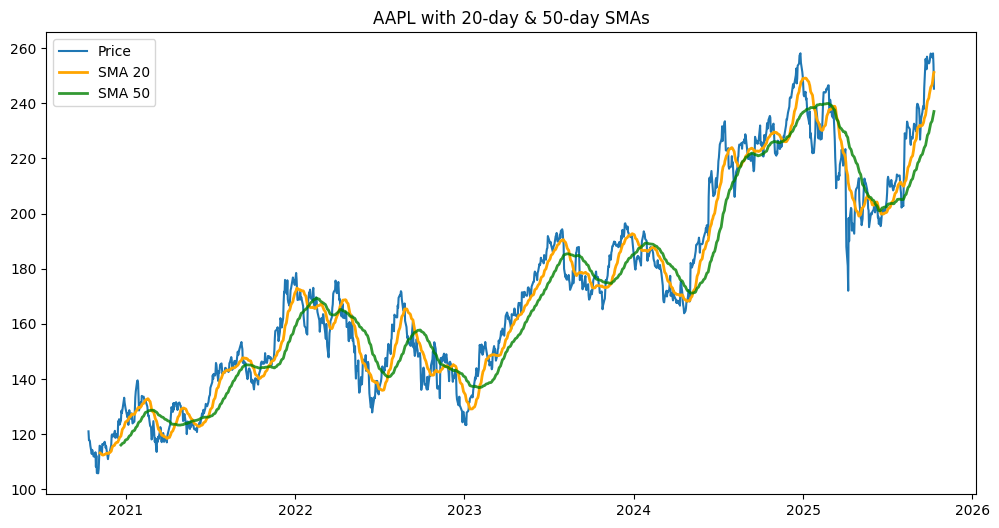

In [79]:
plt.figure(figsize=(12,6))
plt.plot(df['price'], label='Price')
plt.plot(df['sma_fast'], label=f'SMA {fast_window}', color='orange', linewidth=2)
plt.plot(df['sma_slow'], label=f'SMA {slow_window}', color='green', linewidth=2, alpha=0.8)
plt.legend()
plt.title('AAPL with 20-day & 50-day SMAs')
plt.show()

In [80]:
df['signal_raw'] = (df['sma_fast'] > df['sma_slow']).astype(int)
df['signal_confirm'] = (df['signal_raw'].rolling(2).sum() == 2).astype(int)
df['signal'] = df['signal_confirm'].shift(1).fillna(0)
df['trade'] = df['signal'].diff().fillna(0)
entries = (df['trade'] == 1).sum()
exits   = (df['trade'] == -1).sum()
entries, exits

(np.int64(16), np.int64(15))

## 5- Backtesting the Strategy

Now that I’ve defined our trading signals, I'll measure how the strategy actually performs compared to a simple buy-and-hold approach.

We’ll go through the following steps:

1. **Daily Returns:**  
   Calculate the day-to-day percentage change in the stock’s price.

2. **Strategy Returns (Gross Return from our strategy):**  
   Apply the trading signal. We’re “in” the market when `signal == 1` and “out” when `signal == 0`.  
   This gives us the raw (gross) performance of the strategy before any costs.

3. **Transaction Costs:**  
   To make the backtest a bit more realistic, I’ll include a small trading cost every time a position changes  
   (Let's consider **0.10% per switch day**, which covers both entries and exits).

4. **Net Strategy Returns:**  
   Subtract the trading cost on switch days to get the strategy’s **net daily returns**.

5. **Cumulative Growth:**  
   Track how a $1 investment would grow over time for both:
   - A simple **buy-and-hold** investor.
   - The **trading strategy** (after costs).

Finally, I’ll take a quick look at the end values to see how each approach performed.


In [81]:
#1) Daily returns 
df['daily_ret'] = df['price'].pct_change().fillna(0)

# 2) Strategy gross return
df['strat_ret_gross'] = df['signal'] * df['daily_ret']

# 3) Simple trading cost model
cost_per_switch = 0.001
df['cost'] = (df['trade'].abs() > 0).astype(int) * cost_per_switch

# 4) Net strategy return after costs
df['strat_ret_net'] = df['strat_ret_gross'] - df['cost']

# 5) Cumulative growth of $1
df['bh_cum']     = (1 + df['daily_ret']).cumprod()
df['strat_cum']  = (1 + df['strat_ret_net']).cumprod()

# Quick peek at the end values
end_bh    = df['bh_cum'].iloc[-1]
end_strat = df['strat_cum'].iloc[-1]
end_bh, end_strat


(np.float64(2.0269225861056803), np.float64(1.0818572023621353))

## 6- Visualize Strategy Performance

Let’s compare how our **SMA crossover strategy** performs against a simple **buy-and-hold** approach.

The chart below shows the **cumulative portfolio value** of both strategies, starting from an initial investment of $1.

- The **black line** represents a traditional buy-and-hold investor who simply holds AAPL over time.  
- The **orange line** represents our SMA-based trading strategy, which moves in and out of the market based on the crossover signals.

By comparing the two, we can visually assess which strategy was better

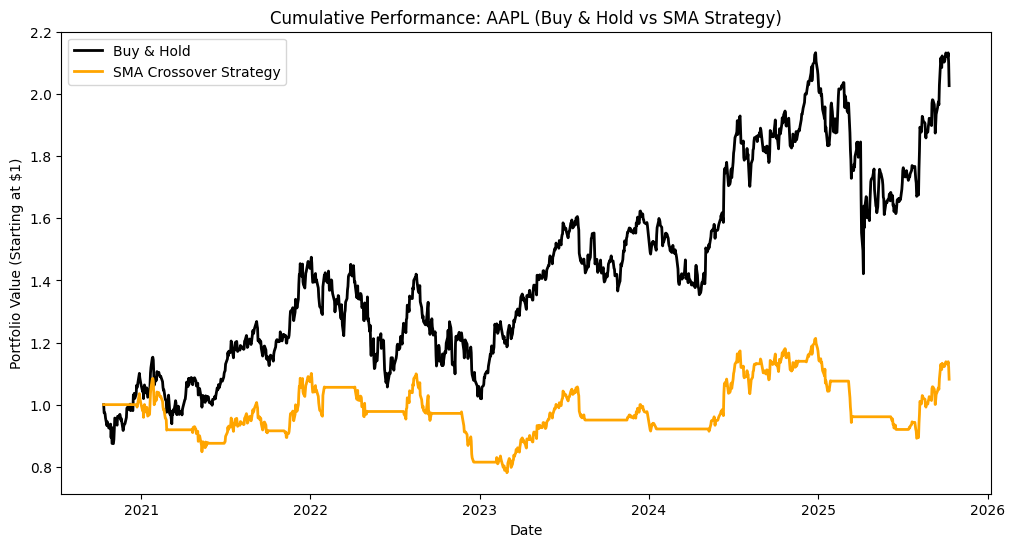

In [82]:
plt.figure(figsize=(12,6))
plt.plot(df['bh_cum'], label='Buy & Hold', color='black', linewidth=2)
plt.plot(df['strat_cum'], label='SMA Crossover Strategy', color='orange', linewidth=2)
plt.title('Cumulative Performance: AAPL (Buy & Hold vs SMA Strategy)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (Starting at $1)')
plt.legend()
plt.show()

## 6-  Result Analysis

The chart shows that the **buy-and-hold strategy** clearly outperformed the **SMA crossover strategy** for Apple.  
This happened because Apple’s stock followed a **strong long-term upward trend**, while the SMA strategy moved in and out of the market too often, missing large portions of those gains.  
Frequent false signals and small trading costs also reduced overall returns. 
SMA crossovers work better in **clearly trending or volatile markets** (like commodities or forex), not in stocks that **consistently move upward** over time.



## 7- Computing the SMA Cross-Over using Backtesting.py 

In [87]:
import pandas as pd
import yfinance as yf
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA  # simple moving average helper

# ---------- 1) Download (force single-level columns if possible) ----------
ticker = "AAPL"

# group_by='column' usually avoids MultiIndex; auto_adjust=True gives adjusted OHLCV
data = yf.download(
    ticker,
    period="5y",
    interval="1d",
    auto_adjust=True,
    group_by="column",
)

# ---------- 2) Normalize columns to EXACT names Open/High/Low/Close/Volume ----------
def coerce_ohlcv(df: pd.DataFrame, ticker: str | None = None) -> pd.DataFrame:
    # If MultiIndex, try to collapse to single ticker level
    if isinstance(df.columns, pd.MultiIndex):
        # Try selecting the ticker from level 0 or 1
        for lvl in (0, 1):
            try:
                if ticker in df.columns.get_level_values(lvl):
                    df = df.xs(ticker, axis=1, level=lvl)
                    break
            except Exception:
                pass
        # If still MultiIndex, prefer the level that contains standard OHLCV names
        if isinstance(df.columns, pd.MultiIndex):
            for lvl in (0, 1):
                lvl_vals = set(df.columns.get_level_values(lvl))
                if {"Open","High","Low","Close","Volume"}.issubset(lvl_vals):
                    df.columns = df.columns.get_level_values(lvl)
                    break

    # If columns have suffixes like 'Open_AAPL', strip them back to base names
    cols = list(df.columns)
    base = ["Open","High","Low","Close","Volume"]
    mapping = {}
    for c in cols:
        for b in base:
            if c == b:
                mapping[c] = b
            elif c.lower().endswith(b.lower()):
                mapping[c] = b
    if mapping:
        df = df.rename(columns=mapping)

    # Keep only the five needed, in order
    needed = ["Open","High","Low","Close","Volume"]
    missing = set(needed) - set(df.columns)
    if missing:
        raise ValueError(f"After coercion, missing columns: {missing}. Got: {list(df.columns)}")

    df = df[needed].copy().sort_index().dropna()
    # Ensure numeric dtypes
    for c in needed:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    df = df.dropna()
    return df

data = coerce_ohlcv(data, ticker=ticker)

# ---------- 3) Strategy: SMA crossover (long-only by default) ----------
class SmaCross(Strategy):
    fast = 20
    slow = 50
    long_only = True

    def init(self):
        price = self.data.Close
        self.sma_fast = self.I(SMA, price, self.fast)
        self.sma_slow = self.I(SMA, price, self.slow)

    def next(self):
        # Bullish cross -> go long
        if crossover(self.sma_fast, self.sma_slow):
            if self.position.is_short:
                self.position.close()
            if not self.position.is_long:
                self.buy()

        # Bearish cross -> exit (or short if allowed)
        elif crossover(self.sma_slow, self.sma_fast):
            if self.long_only:
                if self.position:
                    self.position.close()
            else:
                if self.position.is_long:
                    self.position.close()
                self.sell()

# ---------- 4) Backtest ----------
bt = Backtest(
    data,
    SmaCross,
    cash=10_000,
    commission=0.001,     # 0.10% per trade
    trade_on_close=False,  # act after bar closes (no look-ahead)
    exclusive_orders=True
)

stats = bt.run()
print(stats[['Start', 'End', 'Return [%]', 'Buy & Hold Return [%]', 'Sharpe Ratio', '# Trades', 'Max. Drawdown [%]']])

bt.plot()


[*********************100%***********************]  1 of 1 completed
C:\Users\FLORIAN DIMITRI\AppData\Local\Temp\ipykernel_17644\2224303816.py:106: UserWarning: Some trades remain open at the end of backtest. Use `Backtest(..., finalize_trades=True)` to close them and include them in stats.
  stats = bt.run()


Start                    2020-10-12 00:00:00
End                      2025-10-10 00:00:00
Return [%]                         22.752559
Buy & Hold Return [%]              96.299584
Sharpe Ratio                        0.230283
# Trades                                  14
Max. Drawdown [%]                 -28.370698
dtype: object


GridPlot(id='p1735', ...)